# Obligatorio 1

El opbligatorio consta de dos actividades, en primer lugar, la implementación de los algoritmos de aprendizaje vistos en clase, estos es:
1. Implementación de los algoritmos de aprendizaje: 
    * Fictitious Play (FP) 
    * Regret Matching (RM) 
    * Independent Q-Learning (IQL) 
    * Joint-Action Learning - Agent Modeling (JAL-AM)  

Y por otro lado constara de la validación de los algoritmos a través de la experimentación. Para eso se define la interacción con los siguientes ambientes:  

2. Validación de los algoritmos con los ambientes:  
    * Matching Pennies (MP)   
    * Rock-Paper-Scissor (RPS)   
    * Blotto   
    * Foraging   

## Implementación de los algoritmos

Los algoritmos de aprendizaje fueron implementados cada uno con su propia clase de Python, los mismos serán adjuntados junto al informe y el resto de los códigos. A continuación listamos los códigos de las implementaciones:    

* Fictitious Play (FP): fictitious.py  
* Regret Matching (RM): regretmatching.py  
* Independet Q-Learning (IQL): iql_agent.py  
* Joint-Action Learning - Agent Modeling (JAL-AM): jalam_agent.py    

A su vez, para entrenar a cada uno de los agentes utilizando los ambientes pertinentes, generamos un *notebook* para cada uno de ellos:    
* IQL.ipynb: *Notebook* para entrenar agentes IQL en el juego *Foraging*.  
* JALAM-ipynb: *Notebook* para entrenar agentes JAL-AM en el juego *Foraging*.  
* FP.ipynb: *Notebook* para entrenar agentes FP para cualquiera de los ambientes *Matching Pennies* o *RPS*.    

**FALTA**

## Validaciones  

Esta sección será la más extensa puesto que intentaremos, de manera ordenada, explicar y analizar los experimentos realizados y los resultados obtenidos en los diferentes ambientes a la vez que comparamos los resultados de los diferentes tipos de agentes.  

### FP vs FP

En este apartado observaremos como interactuan dos agentes que implementan el algoritmo de *Ficticious Play*. 

#### Matching Pennies   
Siempre que presentemos un nuevo ambiente, describiremos brevemente las reglas del juego y otros elementos del ambiente.  

**Descripción:**  
Matching Pennies es un juego competitivo donde dos jugadores deben elegir el lado de una moneda, la elección puede ser cara (H *heads*) o cruz (T *tails*). Por defecto el jugador 1 gana si ambos jugadores eligen la misma cara de la moneda y el jugador 2 gana si eligen diferente.  

**Ambiente:**  
* Estático: 1 jugada.  
* Jugadores: Siempre 2.    
* Conjunto de acciones posibles: $A = \{H, T\}$.  
* Estados posibles: $S = \{(H, H), (H, T), (T, H), (T, T)\}$.  
* Recompensas: $R = \{-1, 1\}$, r=1 es la recompensa por ganar y r=-1 por perder.  

**Nota:** Las recompensas son de suma cero.

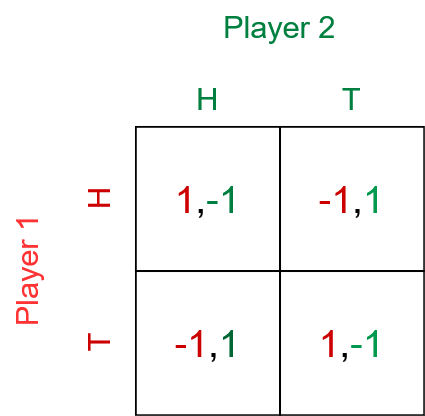


**Resultados:**  
Cuando dos agentes que implementan *ficticiousplay* compiten en *Matching Pennies* sus politicas terminan por converger al valor esperado de $\pi (a=H)= \pi (a=T) = 0.5$. Esto se debe a que *ficticiousplay* va a converger a un equilibrio de Nash, en este caso el único equilibrio que existe es el recién planteado. Es bastante intuitivo en este caso pensar en que si ambos jugadores juegan de forma lógica, intentando ganar, ambos llegaran a la conclusión de que lo mejor que pueden hacer es jugar de manera uniforme a las opciones que tienen.  

**Experimentos:**  
Luego de entrenar a los agentes llegamos a algo muy similar a $\pi^*$:   
{'agent_0': array([0.49840299, 0.50159701]),  
 'agent_1': array([0.49935399, 0.50064601])}  

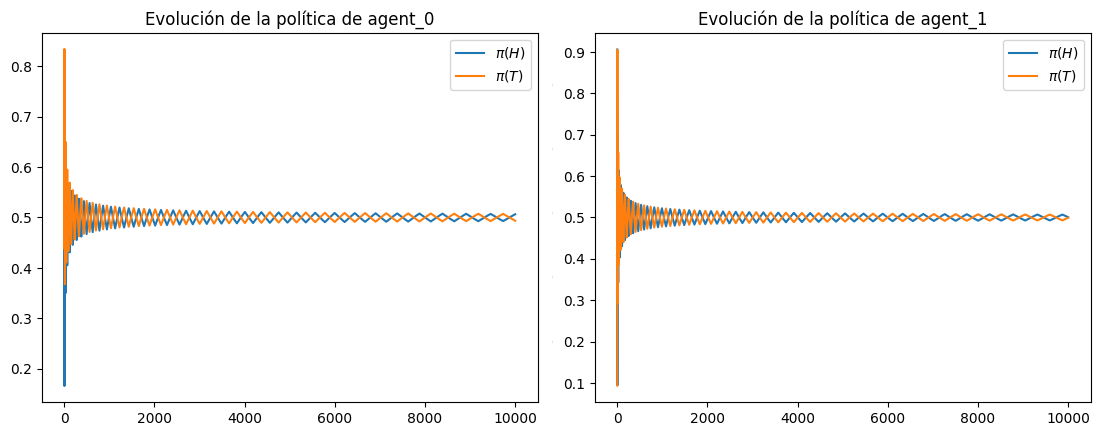

Las políticas de los agentes convergen al equilibrio de Nash $\pi(0.5, 0.5)$.

#### Rock, Paper, Scissors

**Descripción:**  
Este juego no necesita introducción, es el conocido Piedra, Papel y Tijera.  

**Ambiente:**  
* Estático: 1 jugada.  
* Jugadores: Siempre 2.    
* Conjunto de acciones posibles: $A = \{R, P, S\}$.  
* Estados posibles: $S = {(R, R), (R, P), (R, S), (P, R), (P, P), (P, S), (S, R), (S, P), (S, S)}$
* Recompensas: $R = \{-1, 0, 1\}$, r=1 es la recompensa por ganar, r=0 de empatar y r=-1 por perder.  

**Nota:** Las recompensas son de suma cero.  

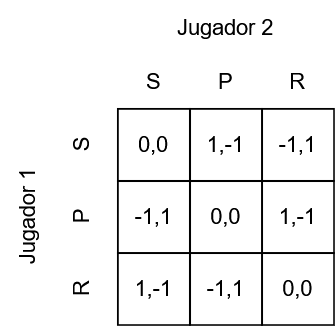

**Resultados:**  
Cuando dos agentes que implementan *ficticiousplay* compiten en *Rock, Paper, Scissors* sus politicas terminan por converger al valor esperado de $\pi (a=R)= \pi (a=P) = \pi (a=S) = \frac{1}{3}$. De la misma forma que era intuitivo pensar que esto ocurriera en *Matching Pennies*, también es intuitivo que sucede en este juego, si ambos jugadores juegan con intención de ganar y no se sesgan por un resultado, entonces el equilibrio es elegir la acción al azar.  

**Experimentos:**  
Luego de entrenar a los agentes llegamos a algo muy similar a $\pi^*$:    
{'agent_0': array([0.33082032, 0.33853934, 0.33064033]),  
 'agent_1': array([0.33454649, 0.32690839, 0.33854512])}  

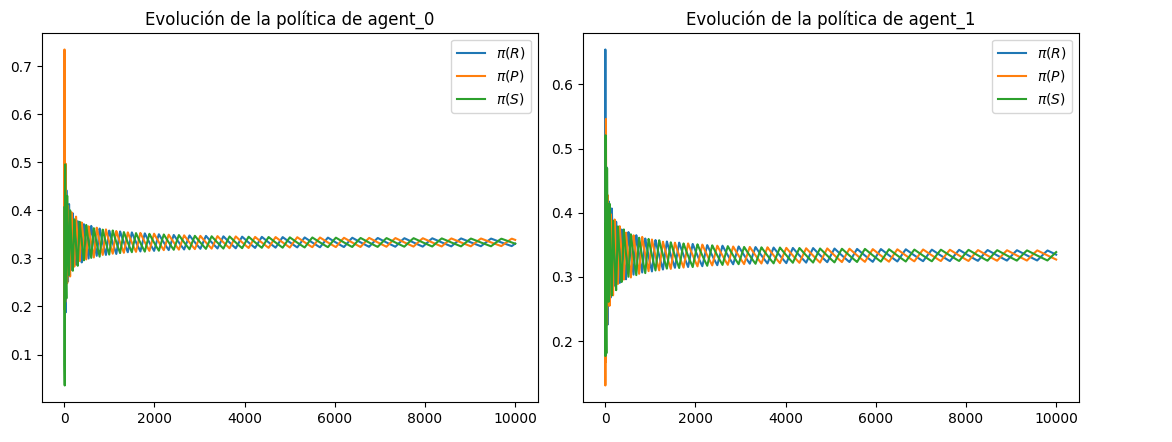

En las imagenes presentadas podemos observar como convergen las políticas de los agentes hacía el equilibrio de Nash $\pi(\frac{1}{3},\frac{1}{3},\frac{1}{3})$.

#### Blotto  

**Descripción:**  
Blotto es un juego competitivo de estrategia, donde dos jugadores se enfrentan por ganar la mayor cantidad de frentes posibles. Cada jugador cuenta con S soldados que debe repartir en N fuertes con el objetivo de ganar en la mayoría de ellos. Un jugador conquista un frente si tiene más soldados en este que su contrincante. Gana el jugador que más fentes conquiste.    

**Ambiente:**  
* Estático: 1 jugada.  
* Jugadores: 2 en la versión implementada.    
* Conjunto de acciones posibles: $A = \{S_0, S_1, ..., S_N\}$, con $\sum_i^N{S_i} = S$ (mi acción es cuantos soldados colocar en c/u de los N frentes siendo que tengo S soldados).  
* Estados posibles: $\{acción conjunta de los jugadores\} = A \times A$
* Recompensas: $R = \{-1, 0, 1\}$, r=1 es la recompensa por ganar, r=0 de empatar y r=-1 por perder.  

**Nota:** Las recompensas son de suma cero.  

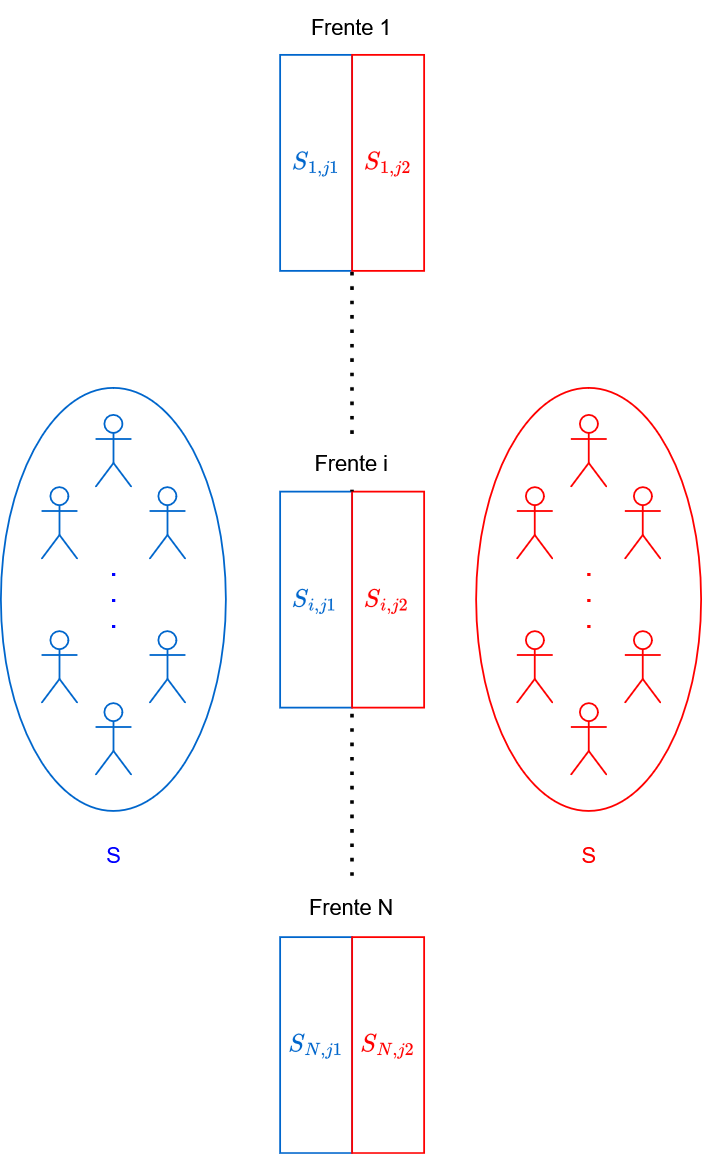

## RM vs RM  
En este apartado observaremos como interactuan dos agentes que implementan el algoritmo de *Regret Matching*.  



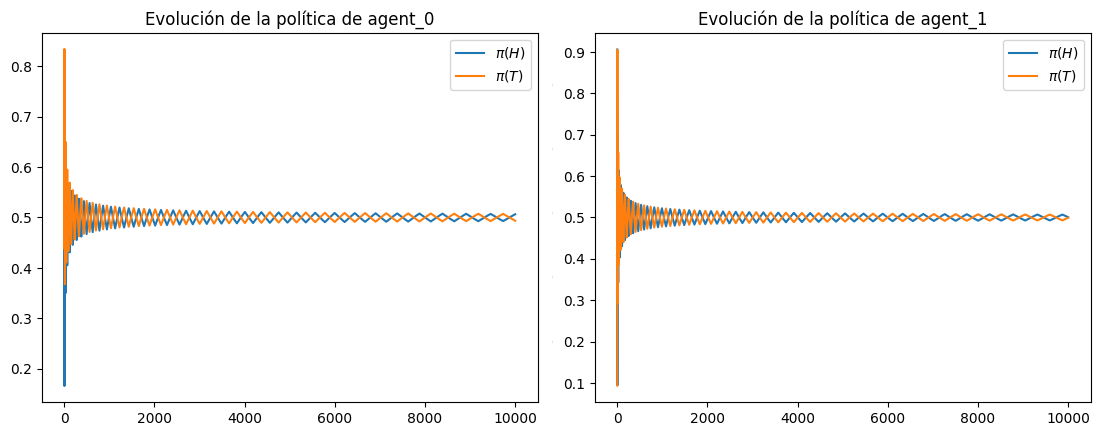

In [5]:
import base64

with open(r"C:\Users\Guillermo\Downloads\mp_pi_convergeance.png", "rb") as img_file:
    encoded_string = base64.b64encode(img_file.read()).decode('utf-8')

# Para HTML:
html_img = f'<img src="data:image/png;base64,{encoded_string}" alt="Rock, Paper, Scissors"/>'
print(html_img)